In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('project_data.csv')
df.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,06-Sep,240,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55,PF,21,06-Aug,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,7-0,238,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12,PG,22,06-Feb,190,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36,PG,22,06-Apr,220,Oklahoma State,3431040.0


In [7]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [11]:
df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [13]:
# Replacing values in the 'Height' column with random numbers between 150 and 180
df['Height'] = np.random.randint(150, 181, size = len(df))

# Filling missing values in the 'College' column with the mode.
college_mode = df['College'].mode()[0]
df['College'].fillna(college_mode, inplace = True)

# Filling missing values with mean in 'Salary' column.
salary_mean = df['Salary'].mean()
df['Salary'].fillna(salary_mean, inplace = True)

df.to_csv('cleaned_file.csv', index=False)

print("Missing Values have been treated.")

Missing Values have been treated.


C:\Users\soora\AppData\Local\Temp\ipykernel_8508\2889719617.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['College'].fillna(college_mode, inplace = True)
C:\Users\soora\AppData\Local\Temp\ipykernel_8508\2889719617.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [15]:
df1 = pd.read_csv('cleaned_file.csv')
df1.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,170,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,151,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,167,205,Boston University,4.833970e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,150,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,157,231,Kentucky,5.000000e+06
5,Amir Johnson,Boston Celtics,90,PF,29,169,240,Kentucky,1.200000e+07
6,Jordan Mickey,Boston Celtics,55,PF,21,175,235,LSU,1.170960e+06
7,Kelly Olynyk,Boston Celtics,41,C,25,157,238,Gonzaga,2.165160e+06
8,Terry Rozier,Boston Celtics,12,PG,22,162,190,Louisville,1.824360e+06
9,Marcus Smart,Boston Celtics,36,PG,22,175,220,Oklahoma State,3.431040e+06


In [17]:
# Counting the number of employees in each team

team_distribution = df1['Team'].value_counts()

# Percentage of employeees on each team

team_percentage = (team_distribution/ len(df1)) * 100

# Dataframe to display distribution and percentage
team_df = pd.DataFrame({
    'Number of Employees' : team_distribution,
    'Percentage of Employees (%)' : team_percentage
})
print(team_df)

                        Number of Employees  Percentage of Employees (%)
Team                                                                    
New Orleans Pelicans                     19                     4.148472
Memphis Grizzlies                        18                     3.930131
Utah Jazz                                16                     3.493450
New York Knicks                          16                     3.493450
Milwaukee Bucks                          16                     3.493450
Brooklyn Nets                            15                     3.275109
Portland Trail Blazers                   15                     3.275109
Oklahoma City Thunder                    15                     3.275109
Denver Nuggets                           15                     3.275109
Washington Wizards                       15                     3.275109
Miami Heat                               15                     3.275109
Charlotte Hornets                        15        

<function matplotlib.pyplot.show(close=None, block=None)>

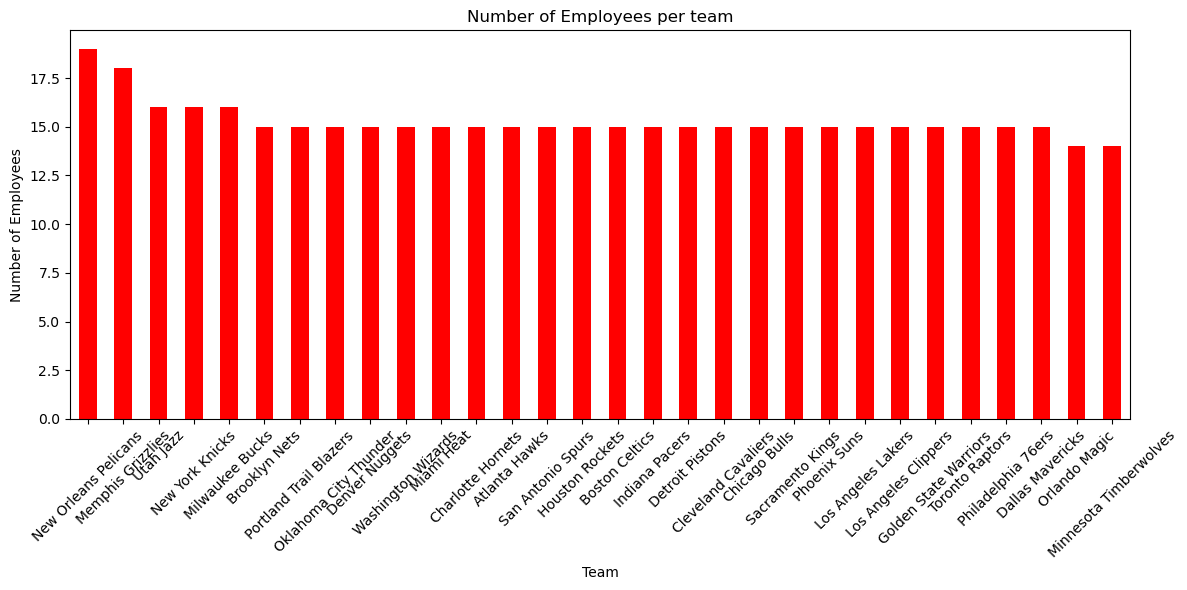

In [23]:
# Bar Chart - Number of Employees per Team
plt.figure(figsize=(12,6))
team_df['Number of Employees'].plot(kind='bar', color='red')
plt.title('Number of Employees per team')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

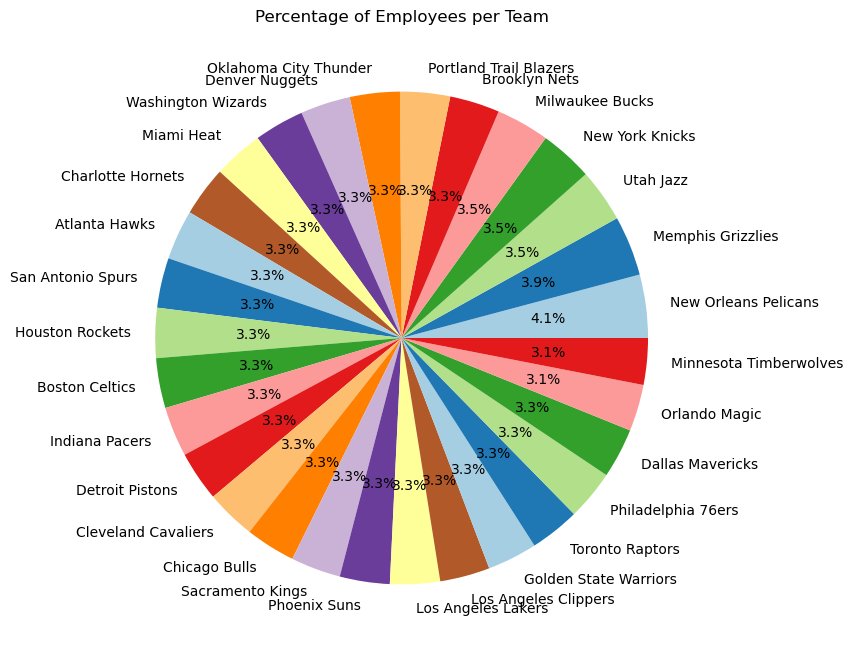

In [21]:
# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(team_df['Percentage of Employees (%)'], labels=team_df.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentage of Employees per Team')
plt.tight_layout
plt.show()

In [25]:
# Number of Employees in each position 
position_distribution = df1['Position'].value_counts()

# Percentage of Employees in each position
position_percentage = (position_distribution / len(df1)) * 100

# Dataframe
position_df = pd.DataFrame({
    'Number of Employees' : position_distribution,
    'Percentage of Employees' : position_percentage
})

print(position_df)

          Number of Employees  Percentage of Employees
Position                                              
SG                        102                22.270742
PF                        100                21.834061
PG                         92                20.087336
SF                         85                18.558952
C                          79                17.248908


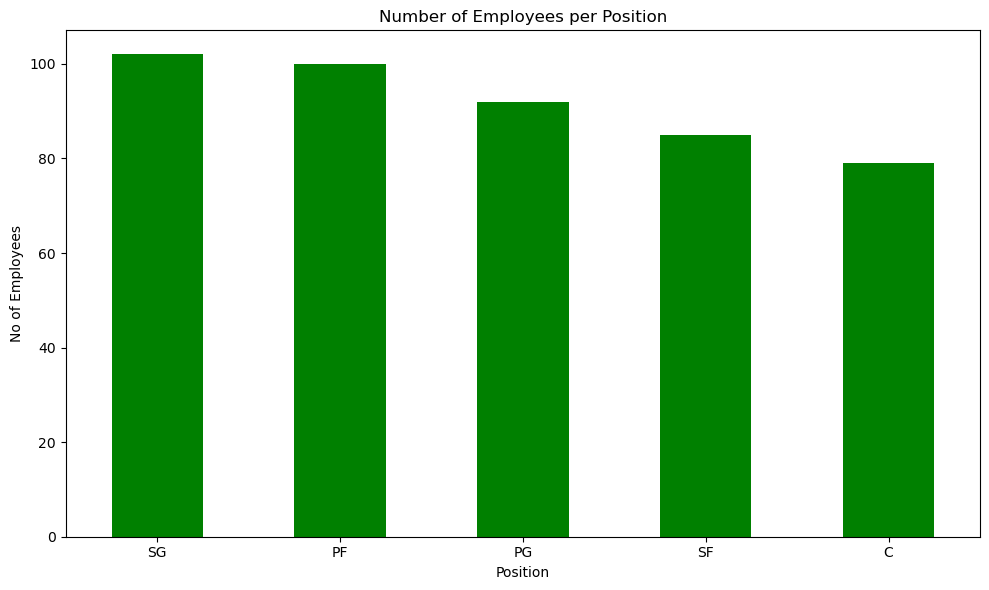

In [27]:
# Bar chart - Number of employees per position 
plt.figure(figsize=(10,6))
position_df['Number of Employees'].plot(kind='bar', color='green')
plt.title('Number of Employees per Position')
plt.xlabel('Position')
plt.ylabel('No of Employees')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

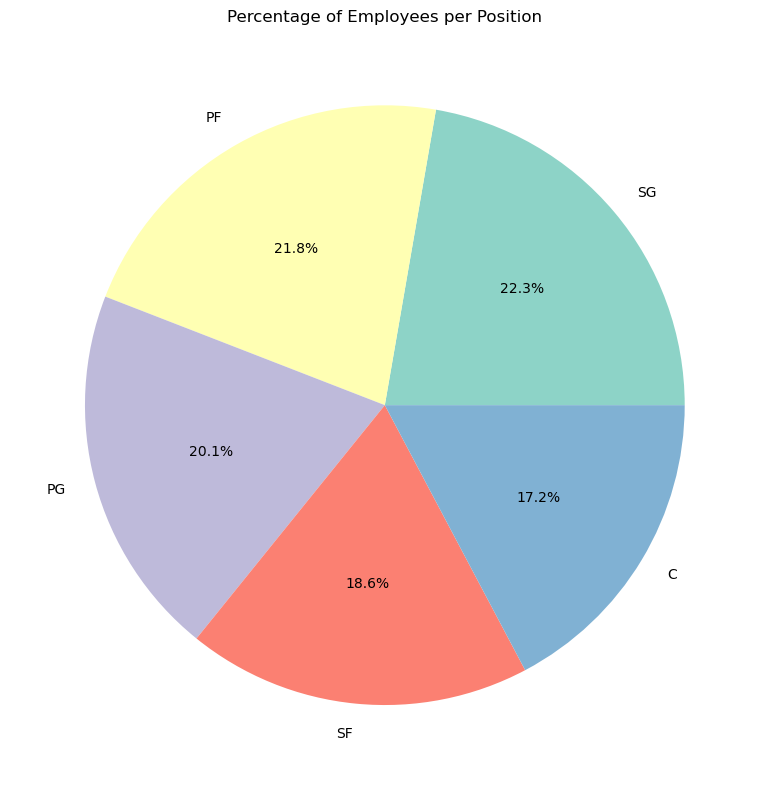

In [29]:
# Pie chart - Percentage of employees on each position
plt.figure(figsize=(8, 8))
plt.pie(position_df['Percentage of Employees'], labels=position_df.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Percentage of Employees per Position')
plt.tight_layout()
plt.show()

In [31]:
df2 = pd.read_csv('cleaned_file.csv')
df2

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,170,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,151,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,167,205,Boston University,4.833970e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,150,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,157,231,Kentucky,5.000000e+06
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,150,203,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,24,153,179,Kentucky,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,26,163,256,Kentucky,2.900000e+06
456,Jeff Withey,Utah Jazz,24,C,26,153,231,Kansas,9.472760e+05


In [33]:
# Creating age category
age_bins = [20,30,40,50]
age_labels = ['20-30', '31-40', '41-50']
df2['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Number of employees in each age group
age_group_distribution = df2['Age Group'].value_counts().sort_index()

# Percentage of employees in each age group
age_group_percentage = (age_group_distribution / len(df2)) * 100

# Data Frame
age_group_df = pd.DataFrame({
    'Number of Employees': age_group_distribution,
    'Percentage of Employees (%)': age_group_percentage
})

print(age_group_df)

           Number of Employees  Percentage of Employees (%)
Age Group                                                  
20-30                      334                    72.925764
31-40                      119                    25.982533
41-50                        3                     0.655022


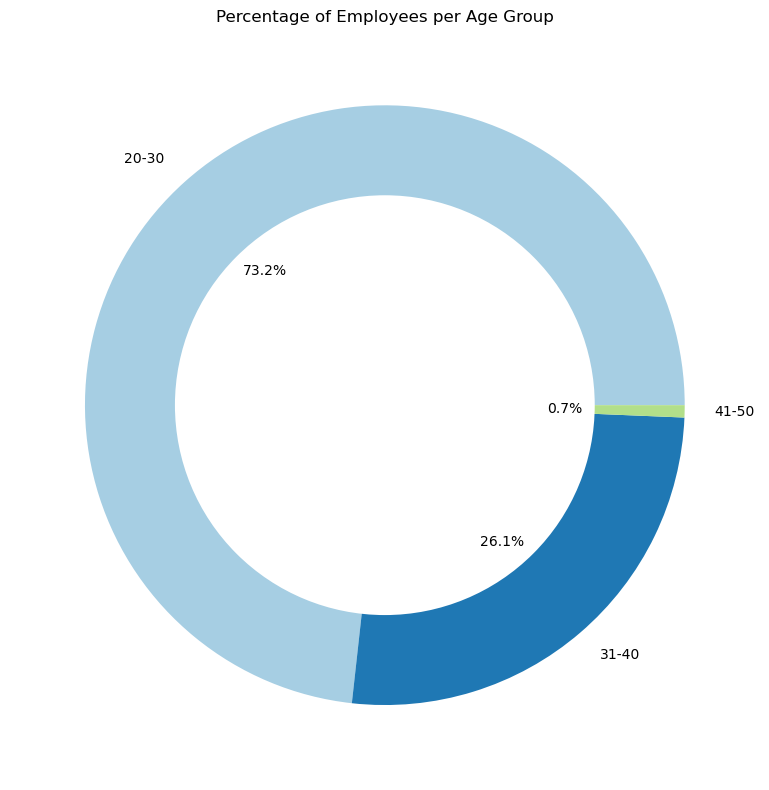

In [35]:
# donut chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_df['Percentage of Employees (%)'], labels=age_group_df.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
# Create the donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Percentage of Employees per Age Group')
plt.tight_layout()
plt.show()

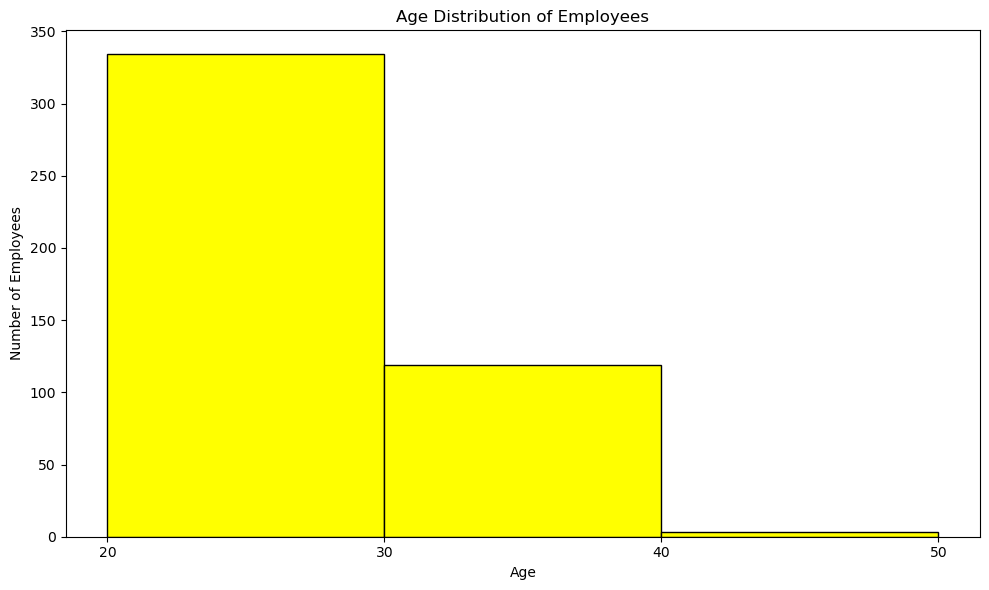

In [37]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=age_bins, edgecolor='black', color='yellow')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.xticks(age_bins)
plt.tight_layout()
plt.show()

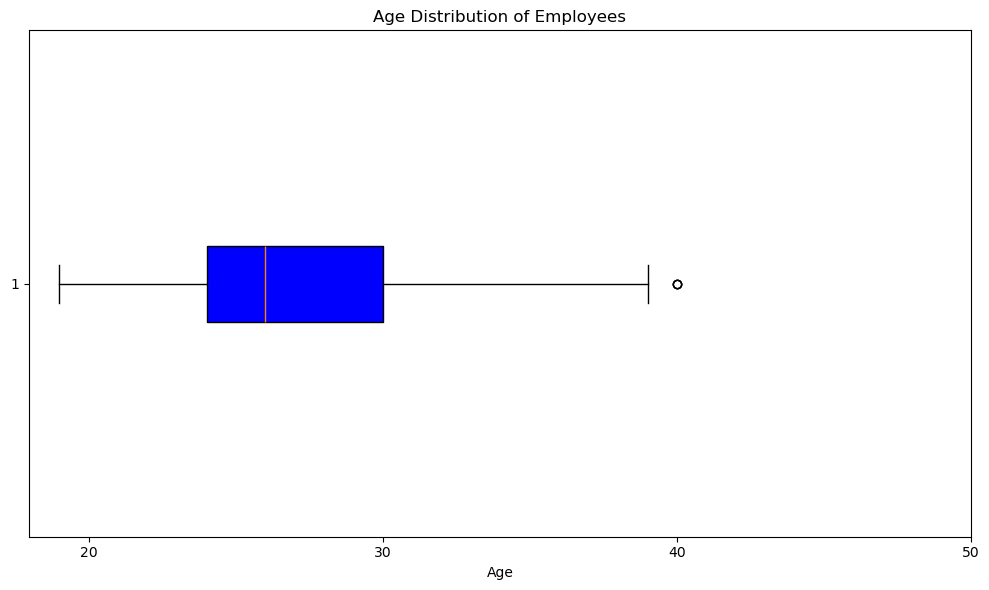

In [39]:
# Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.xticks(age_bins)
plt.tight_layout()
plt.show()

In [41]:
# Group by team and position and calculating total salary
team_position_salary = df1.groupby(['Team','Position'])['Salary'].sum().reset_index()

# sorting decsending order
team_position_salary = team_position_salary.sort_values(by='Salary', ascending=False)

print(team_position_salary)

                   Team Position      Salary
67   Los Angeles Lakers       SF  31866445.0
75           Miami Heat       PF  31538671.0
53      Houston Rockets       SG  28122883.0
116        Phoenix Suns       PG  28002998.0
37       Denver Nuggets       SF  27982771.0
..                  ...      ...         ...
82      Milwaukee Bucks       SF   3104287.0
112  Philadelphia 76ers       SF   1845059.0
125    Sacramento Kings       PF   1370152.0
74           Miami Heat        C    981348.0
107       Orlando Magic       SF    845059.0

[149 rows x 3 columns]


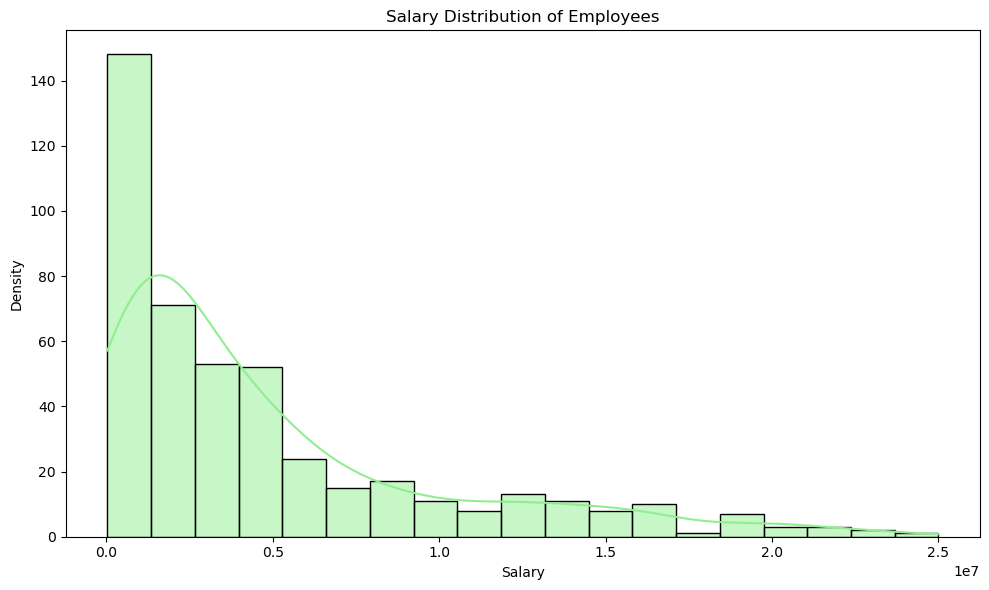

In [43]:
# distplot
plt.figure(figsize=(10,6))
sns.histplot(df1['Salary'], kde=True, color='lightgreen')
plt.title('Salary Distribution of Employees')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

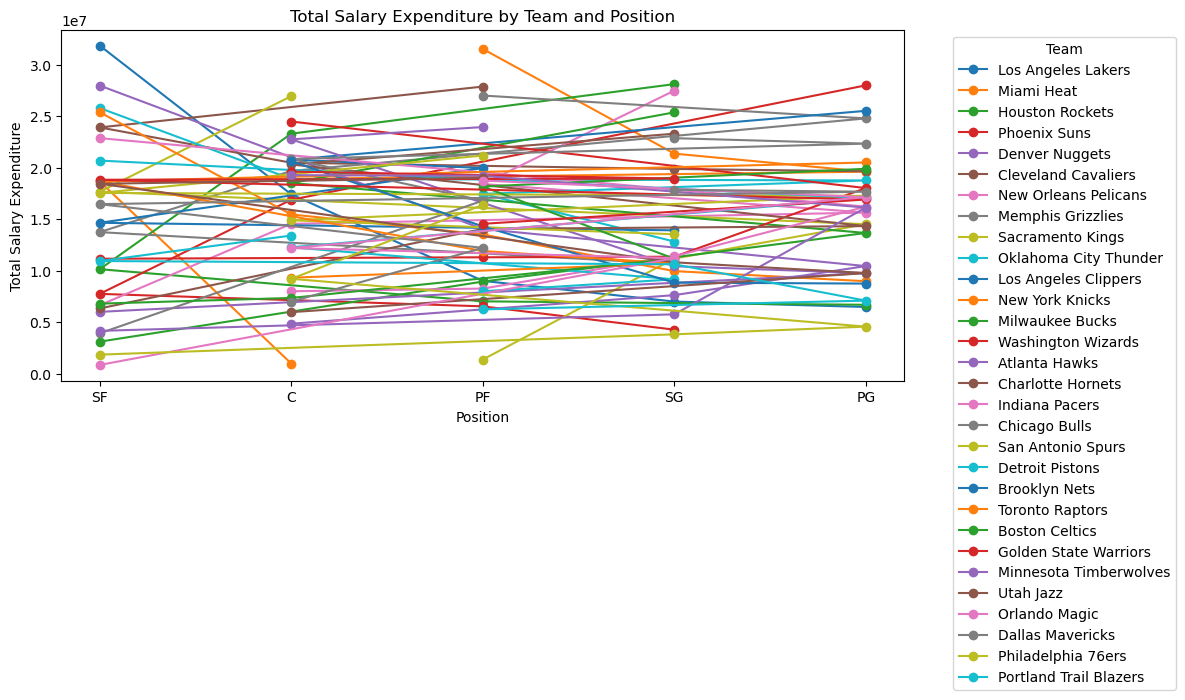

In [45]:
# Line plot
plt.figure(figsize=(12,6))
for team in team_position_salary['Team'].unique():
    team_data = team_position_salary[team_position_salary['Team']==team]
    plt.plot(team_data['Position'], team_data['Salary'], marker='o', label=team)

plt.title('Total Salary Expenditure by Team and Position')
plt.xlabel('Position')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=0)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [47]:
# Correlation between age and Salary
correlation = df1[['Age', 'Salary']].corr()
print("Correlation between Age and Salary")
print(correlation)

Correlation between Age and Salary
            Age   Salary
Age     1.00000  0.21117
Salary  0.21117  1.00000


<Figure size 800x600 with 0 Axes>

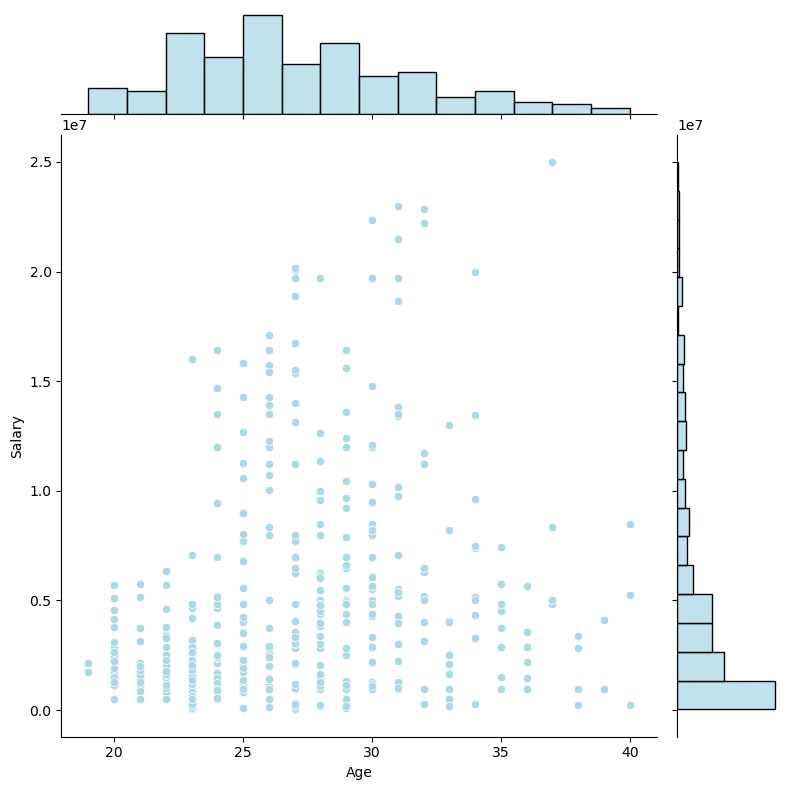

In [51]:
# Joint Plot
plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Salary', data=df, kind='scatter', color='lightblue', height=8)
plt.title('Joint Plot of Age vs Salary', loc='left', fontsize=15)
plt.show()

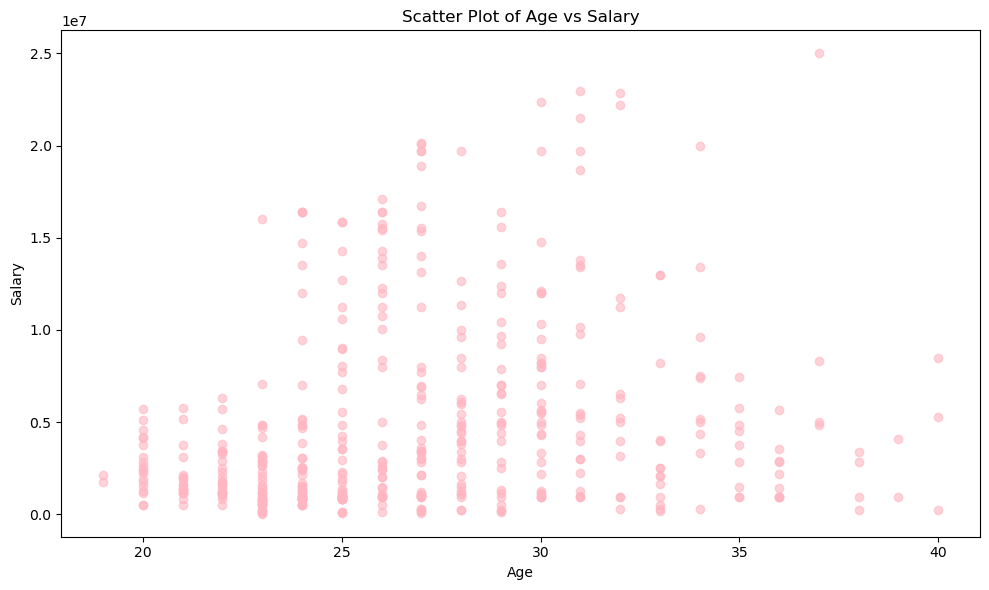

In [53]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df1['Age'], df1['Salary'], color='lightpink', alpha=0.6)
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

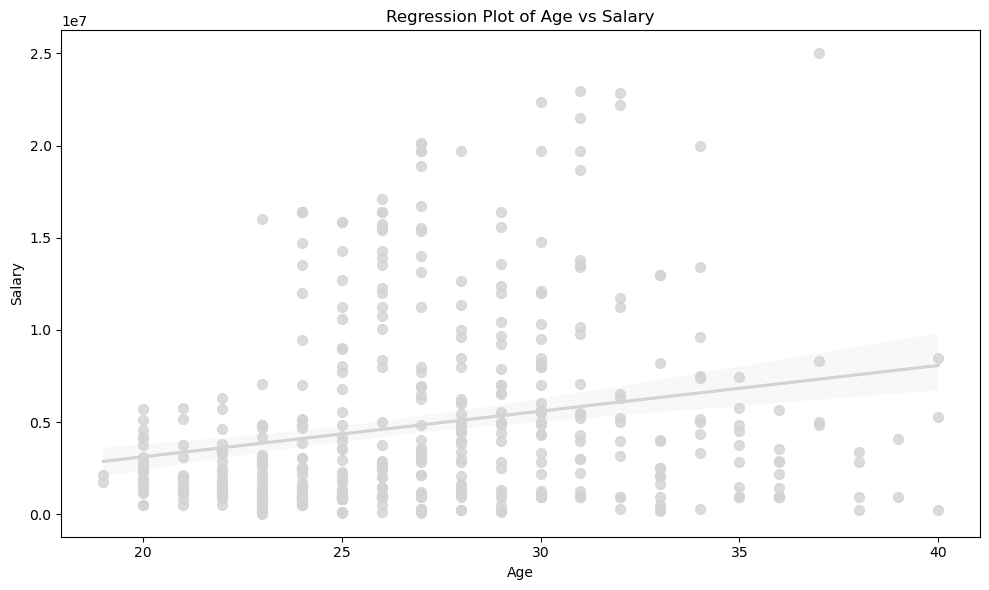

In [57]:
# Regression plot with trend line
plt.figure(figsize=(10,6))
sns.regplot(x='Age', y='Salary', data=df1, scatter_kws={'s': 50}, color='lightgrey')
plt.title('Regression Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()